<a href="https://colab.research.google.com/github/hassanjawad1/ML-2024/blob/master/Placment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df =pd.read_csv('/content/drive/MyDrive/Datasets/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


#### 1. Preprocessing

In [8]:
df= df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


#### 2.EDA

In [10]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [11]:
import matplotlib.pyplot as pl

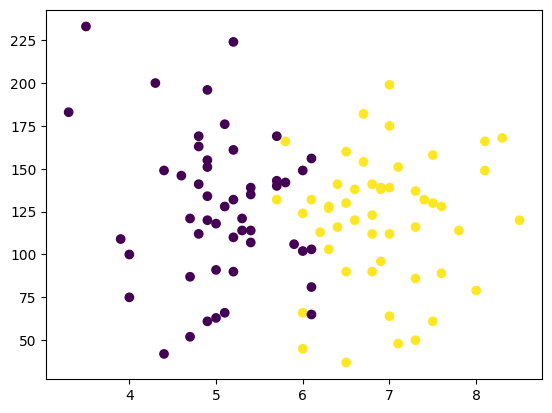

In [12]:
pl.scatter(df['cgpa'],df['iq'],c =df['placement'])

### Input output selection

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [18]:
X_test

,cgpa,iq
91,7.5,158.0
69,8.5,120.0
0,6.8,123.0
35,6.8,90.0
36,5.7,140.0
89,4.9,151.0
73,4.9,61.0
86,5.1,128.0
58,8.0,79.0
43,6.8,141.0


### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train= scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 1.40740420e+00,  1.45862599e-01],
       [-1.73902819e+00, -1.20877130e+00],
       [ 1.04781193e+00, -1.87377339e+00],
       [-5.70353301e-01, -7.58047654e-02],
       [ 9.57913862e-01,  1.84531239e+00],
       [ 1.48831247e-01, -1.45506837e+00],
       [ 1.22760807e+00, -1.98953301e-01],
       [ 1.22760807e+00, -1.82451397e+00],
       [ 5.89331782e-02, -5.43769202e-01],
       [-1.37943592e+00,  6.13827035e-01],
       [-6.60251369e-01,  2.46105507e+00],
       [ 4.18525452e-01,  4.16789378e-01],
       [ 5.89331782e-02,  6.13827035e-01],
       [-2.36831467e+00,  1.45123708e+00],
       [-6.60251369e-01, -8.39325688e-01],
       [-8.40047506e-01, -1.49693887e-01],
       [-4.80455232e-01, -4.20620666e-01],
       [ 1.22760807e+00,  3.18270549e-01],
       [-1.01984364e+00,  4.16789378e-01],
       [-8.40047506e-01, -1.50432778e+00],
       [-4.80455232e-01, -2.48212716e-01],
       [-1.46933399e+00,  1.86994210e+00],
       [-2.10761027e-01,  4.66048792e-01],
       [ 1.

In [23]:
X_test= scaler.transform(X_test)

In [27]:
X_test


array([[ 1.4074042 ,  0.8354944 ],
       [ 2.30638489, -0.10043447],
       [ 0.77811773, -0.02654535],
       [ 0.77811773, -0.83932569],
       [-0.21076103,  0.39215967],
       [-0.92994557,  0.66308645],
       [-0.92994557, -1.5535872 ],
       [-0.75014944,  0.09660318],
       [ 1.85689455, -1.11025247],
       [ 0.77811773,  0.41678938]])

## **Classifier**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

### **Model Training**

In [30]:
clf.fit(X_train,y_train)

LogisticRegression()

### **NOW Evaluate Model**

In [37]:
pred= clf.predict(X_test)

In [38]:
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [34]:
y_test

91    1
69    1
0     1
35    1
36    0
89    0
73    0
86    0
58    1
43    1
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred)

1.0

## **Now Plot**

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

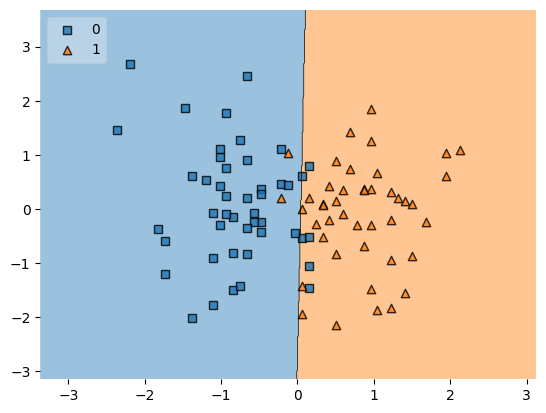

In [42]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

## **Import trained Model for deployment**

In [43]:
import pickle

In [44]:
pickle.dump(clf,open('model1.pkl','wb'))